<a href="https://colab.research.google.com/github/ioahKwon/Machine-Learning-Deep-Learning/blob/master/%5B%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B3%BC%EB%94%A5%EB%9F%AC%EB%8B%9D%5D_Week_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[머신러닝과딥러닝] 수업 정리 Week #13**

### _2020.08._ SKKU Lecture Summary by IOAH


---





### 1. Recurrent Neural Networks 구현

우선 RNN 구현을 위해 sin 함수를 이용하여 데이터를 생성하고 시각화한다. 그후 데이터를 학습 가능한 형태로 전처리하고 이를 확인해본다. 여기서 RNN 데이터를 sin 함수로 주는 이유는 RNN은 시간적 연속성이 존재해야 하기 때문이다.

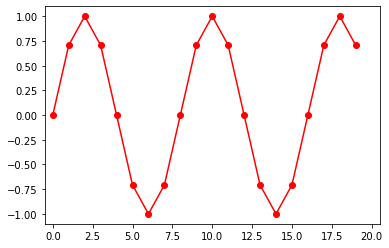

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
plt.plot(s,'ro-')
plt.xlim(-0.5,20.5)
plt.ylim(-1.1,1.1)
plt.show() 

In [ ]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:5, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [ ]:
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1,3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

그 다음 KERAS의 SimpleRNN함수를 이용하여 기본적인 RNN 구조의 모델을 생성하고 데이터를 통해 모델을 학습시킨다.

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

np.random.seed(0)
model = Sequential()
model.add(SimpleRNN(10, input_shape=(3,1)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='sgd')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


우선 학습되기 전 train set를 visualizing하면 아래와 같다.

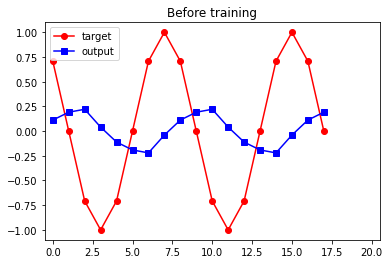

In [ ]:
plt.plot(Y_train, 'ro-', label= 'target')
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label='output')
plt.xlim(-0.5,20.5)
plt.ylim(-1.1,1.1)
plt.legend()
plt.title('Before training')
plt.show()

그 후 epoch을 100으로 주고 학습을 돌린 후 학습 과정에서의 loss값의 변화와 결과값을 visaulizing하면 아래와 같다.

In [ ]:
history = model.fit(X_train,Y_train, epochs = 100, verbose=0)

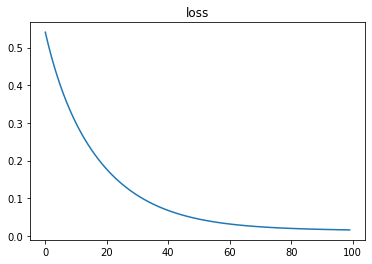

In [ ]:
plt.plot(history.history['loss'])
plt.title('loss')
plt.show()

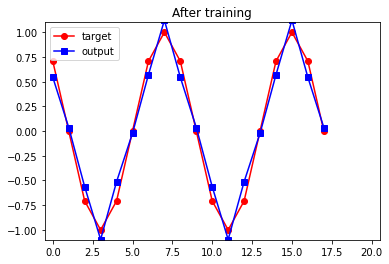

In [ ]:
plt.plot(Y_train, 'ro-', label= 'target')
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label='output')
plt.xlim(-0.5,20.5)
plt.ylim(-1.1,1.1)
plt.legend()
plt.title('After training')
plt.show()

Target 값과 비교했을 때 trainset의 output의 값이 생각보다 굉장히 정교한 것을 확인할 수 있다. 거의 구분이 안될 정도로 잘 학습이 되어 예측을 한 것을 알 수 있다.

### 2. RNN 계열의 GRU, LSTM 모델 구현

이번에는 RNN 계열의 LSTM 모델을 구현해보도록 하겠다. 데이터는 똑같이 sin함수를 이용했다. 같은 구조의 RNN보다 parameter수가 더 많은 것을 알 수 있다. 또한 위와 같이 학습 과정에서의 loss 값의 변화와 결과값을 visualizing하면 아래와 같다.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
s = np.sin(2 * np.pi * 0.125 * np.arange(20))
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))

X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1,3]

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

np.random.seed(0)
model = Sequential()
model.add(LSTM(10, input_shape=(3,1)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='sgd')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


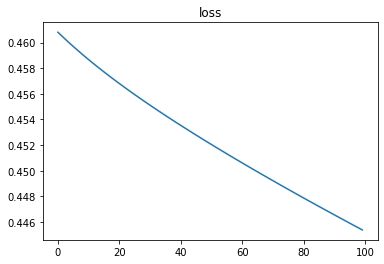

In [ ]:
history = model.fit(X_train,Y_train, epochs = 100, verbose=0)
plt.plot(history.history['loss'])
plt.title('loss')
plt.show()

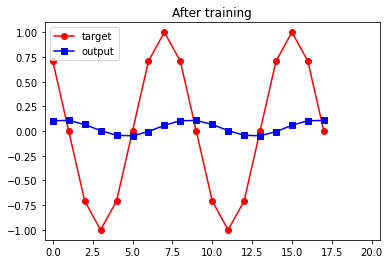

In [ ]:
plt.plot(Y_train, 'ro-', label= 'target')
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label='output')
plt.xlim(-0.5,20.5)
plt.ylim(-1.1,1.1)
plt.legend()
plt.title('After training')
plt.show()

결과를 보면 아직 학습이 덜 되어 있는 것을 알 수 있다. 따라서 epoch 수를 증가시킨 후 모델의 학습 결과를 살펴보자. 각각 총 epoch이 2100인 모델이다.

In [ ]:
history = model.fit(X_train,Y_train, epochs = 2000, verbose=0)

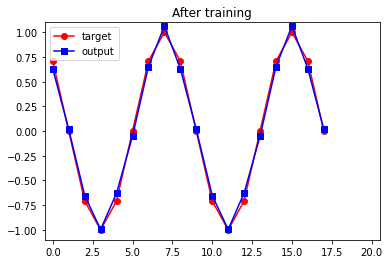

In [ ]:
plt.plot(Y_train, 'ro-', label= 'target')
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label='output')
plt.xlim(-0.5,20.5)
plt.ylim(-1.1,1.1)
plt.legend()
plt.title('After training')
plt.show()

결과를 통해 보면 확실히 총 epoch이 2100인 모델이 target value와 거의 유사함을 확인할 수 있다. 모델의 epoch수 조절을 통해 모델이 변화함을 확인했다.

그럼 이번에는 LSTM이 아닌 GRU로 돌려보면 결과가 어떨까.

In [ ]:
from keras.models import Sequential
from keras.layers import GRU, Dense

np.random.seed(0)
model = Sequential()
model.add(GRU(10, input_shape=(3,1)))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='sgd')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 10)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,Y_train, epochs = 100, verbose=0)

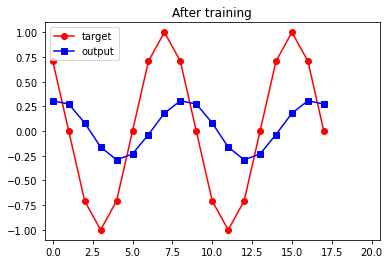

In [ ]:
plt.plot(Y_train, 'ro-', label= 'target')
plt.plot(model.predict(X_train[:,:,:]), 'bs-', label='output')
plt.xlim(-0.5,20.5)
plt.ylim(-1.1,1.1)
plt.legend()
plt.title('After training')
plt.show()

이 역시나 초기엔 학습이 덜 된 것을 볼 수 있다. 그러면 epoch을 위처럼 2100과 3100에 맞춰서 학습시켜보자.

In [1]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving 1.JPG to 1.JPG
User uploaded file "1.JPG" with length 35444 bytes


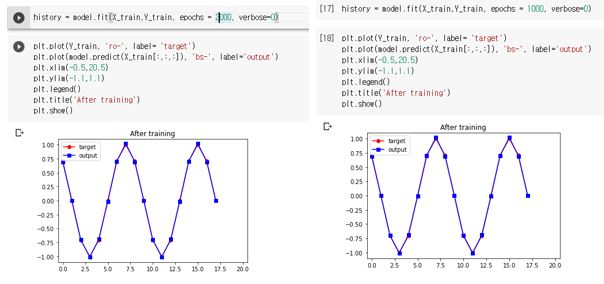

In [2]:
from IPython.display import Image
Image('1.JPG')

Epoch을 2100만 돌려도 target value와 거의 일치함을 확인할 수 있다. GRU 모델 또한 epoch수의 조절을 통해 모델의 변화를 줄 수 있었다.

### 3. Keras Reuter dataset에 RNN 구현

이번에는 keras 모듈에서 제공하는 텍스트 데이터인 reuter 데이터 셋을 적용하여 앞서 실습해본 RNN 구조의 모델을 이용해 Classify 해본다. 우선 주요 모듈을 import하고 데이터를 로드한다.

In [3]:
from tensorflow.keras.datasets import reuters

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

2113536/2110848 [==============================] - 0s 0us/step


In [4]:
print('Train data : {}'.format(len(X_train)))
print('Test data : {}'.format(len(X_test)))
num_classes = max(Y_train) + 1
print('class : {}'.format(num_classes))

Train data : 8982
Test data : 2246
class : 46


In [5]:
word_index = reuters.get_word_index()

557056/550378 [==============================] - 0s 0us/step


우리는  11,288개에 달하는 news를 46개의 topic에 맞춰서 classify해볼 것이다. 그래서 Word one hot encoding 및 모델 생성을 위한 모듈을 위에서 import 해주었고 아래 그림에서 데이터 전처리를 수행한다. Pad_sequences 등의 전처리 모듈을 이용한다. 또한 모델의 학습에 overfitting을 방지하는 EarlyStopping도 추가해준다. 이후 LSTM을 이용하여 모델을 생성하고 모델을 학습한다.

In [6]:
index_word={}
for key,value in word_index.items():
  index_word[value] = key

from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [7]:
max_len = 100
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

Epoch은 총 100번 진행하였다.

In [8]:
model = Sequential()
model.add(Embedding(1000,120))
model.add(LSTM(120))
model.add(Dense(46, activation='softmax'))
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode = 'max', save_best_only =True)
model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics = ['acc'])

In [9]:
history= model.fit(X_train, Y_train, batch_size=128, epochs=10, callbacks=[es,mc], validation_split=0.2)

Epoch 1/10
57/57 [==============================] - 3s 50ms/step - loss: 2.6913 - acc: 0.3446 - val_loss: 2.4075 - val_acc: 0.3450
Epoch 2/10
57/57 [==============================] - 2s 37ms/step - loss: 2.2330 - acc: 0.4188 - val_loss: 2.0503 - val_acc: 0.4814
Epoch 3/10
57/57 [==============================] - 2s 37ms/step - loss: 2.0115 - acc: 0.4902 - val_loss: 2.0776 - val_acc: 0.4546
Epoch 4/10
57/57 [==============================] - 2s 36ms/step - loss: 1.9228 - acc: 0.5111 - val_loss: 1.8168 - val_acc: 0.5281
Epoch 5/10
57/57 [==============================] - 2s 36ms/step - loss: 1.7776 - acc: 0.5321 - val_loss: 1.7546 - val_acc: 0.5320
Epoch 6/10
57/57 [==============================] - 2s 36ms/step - loss: 1.6693 - acc: 0.5685 - val_loss: 1.7035 - val_acc: 0.5520
Epoch 7/10
57/57 [==============================] - 2s 37ms/step - loss: 1.7067 - acc: 0.5680 - val_loss: 1.6463 - val_acc: 0.5760
Epoch 8/10
57/57 [==============================] - 2s 36ms/step - loss: 1.5903 - a

In [10]:
loaded = load_model('best_model.h5')
print("\n 테스트정확도 : %.4f" % (loaded.evaluate(X_test, Y_test)[1]))

71/71 [==============================] - 1s 12ms/step - loss: 1.5106 - acc: 0.6247

 테스트정확도 : 0.6247


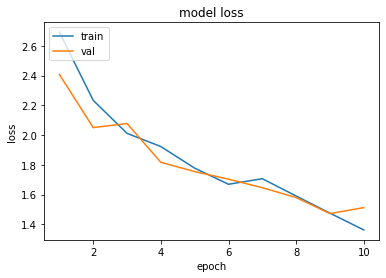

In [11]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

특이하게 Train set의 loss는 계속 줄어들지만 Validation set의 loss는 줄어들다가 다시 끝에가서 소폭 상승하는 모습을 보인다.